In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install  seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [8]:
dengue = pd.read_csv("dengue.csv")

In [9]:
dengue.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [10]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [11]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [12]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [13]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1>Insight 1: Total dengue cases and deaths over the years</h1>

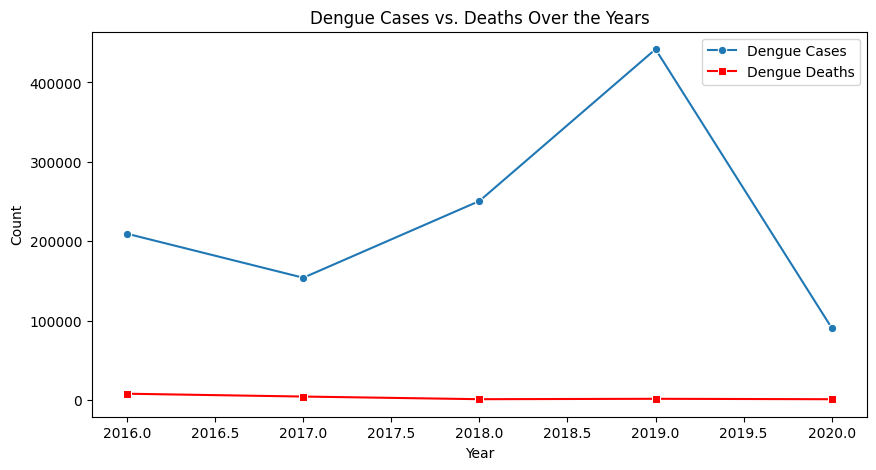

In [19]:
cases_by_year = dengue.groupby("Year")["Dengue_Cases"].sum()
deaths_by_year = dengue.groupby("Year")["Dengue_Deaths"].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x=cases_by_year.index, y=cases_by_year.values, marker='o', label="Dengue Cases")
sns.lineplot(x=deaths_by_year.index, y=deaths_by_year.values, marker='s', label="Dengue Deaths", color='red')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Dengue Cases vs. Deaths Over the Years")
plt.legend()
plt.show()

<h1>Insight 2: Region-wise dengue cases comparison</h1>

In [16]:
total_deaths = dengue["Dengue_Deaths"].sum()
print(f"Total dengue-related deaths recorded: {total_deaths}")

Total dengue-related deaths recorded: 16844


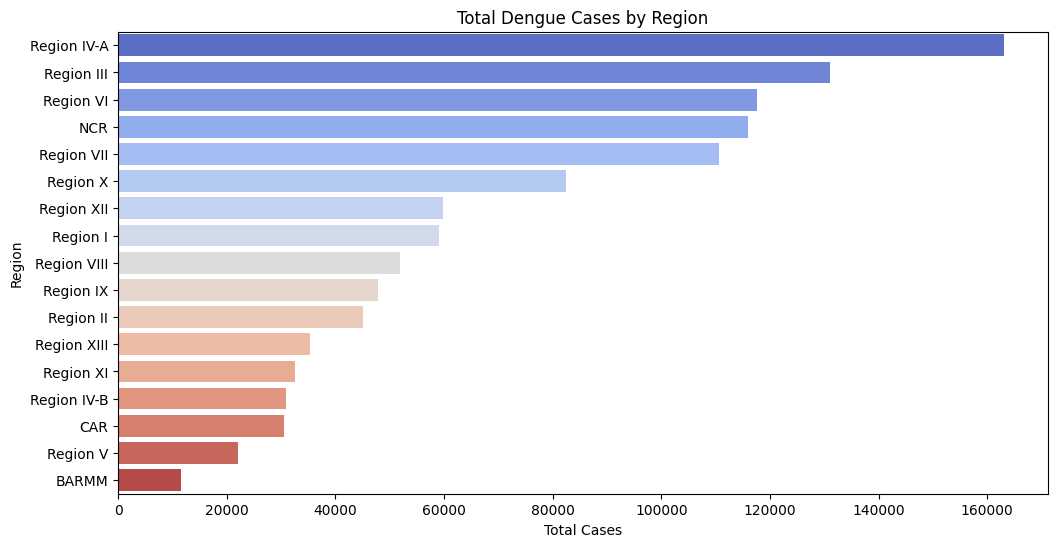

In [20]:
cases_by_region = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=cases_by_region.values, y=cases_by_region.index, palette="coolwarm")
plt.xlabel("Total Cases")
plt.ylabel("Region")
plt.title("Total Dengue Cases by Region")
plt.show()

<h1>Insight 3: Monthly trend of dengue cases</h1>

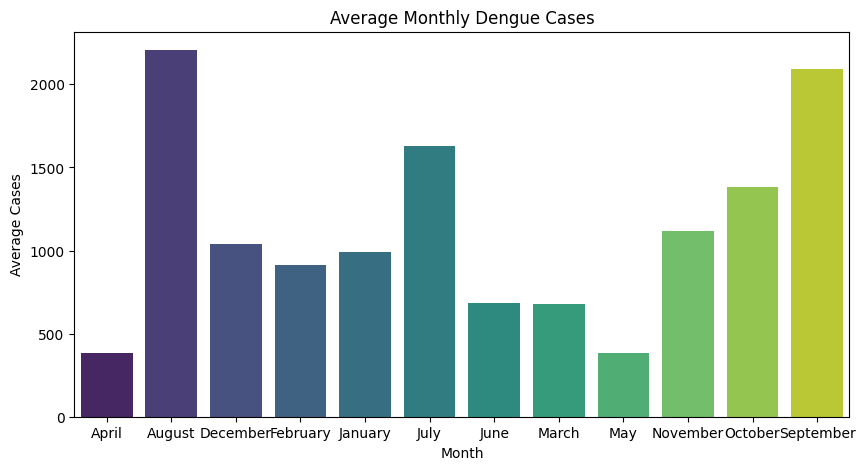

In [21]:
avg_cases_by_month = dengue.groupby("Month")["Dengue_Cases"].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=avg_cases_by_month.index, y=avg_cases_by_month.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.title("Average Monthly Dengue Cases")
plt.show()

<h1>Insight 4: Correlation heatmap between dengue cases and deaths</h1>

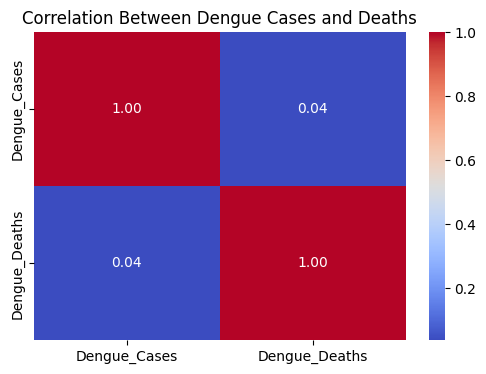

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(dengue[["Dengue_Cases", "Dengue_Deaths"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Dengue Cases and Deaths")
plt.show()

<h1>Insight 5: Death rate per year</h1>

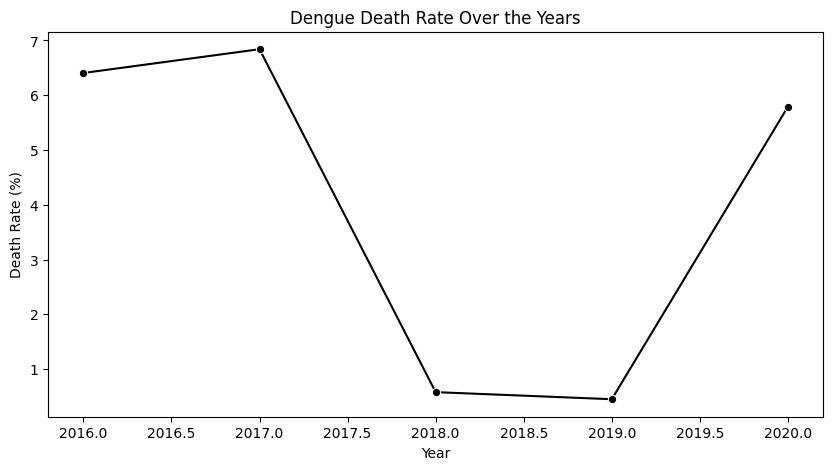

In [24]:
dengue["Death_Rate"] = (dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]) * 100
death_rate_by_year = dengue.groupby("Year")["Death_Rate"].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=death_rate_by_year.index, y=death_rate_by_year.values, marker='o', color='black')
plt.xlabel("Year")
plt.ylabel("Death Rate (%)")
plt.title("Dengue Death Rate Over the Years")
plt.show()

<h1>Insight 6: Month with the Highest Dengue Deaths</h1>

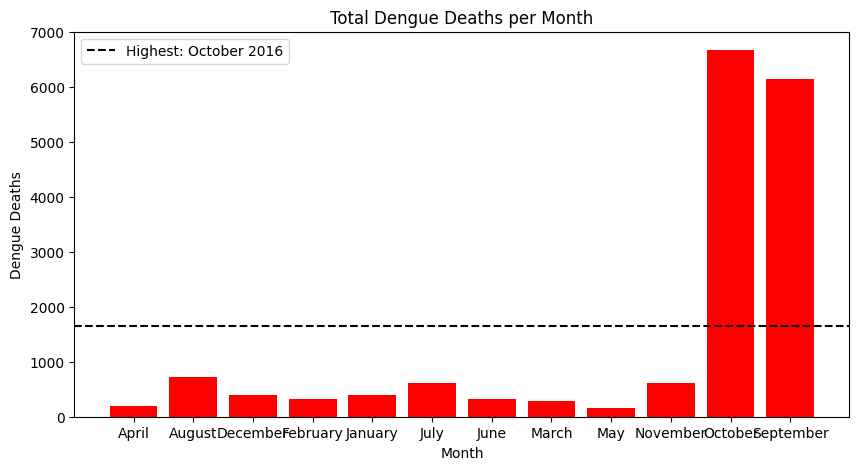

In [26]:
max_deaths_month = dengue.loc[dengue["Dengue_Deaths"].idxmax(), ["Month", "Year", "Dengue_Deaths"]]
monthly_deaths = dengue.groupby("Month")["Dengue_Deaths"].sum()
plt.figure(figsize=(10,5))
plt.bar(monthly_deaths.index, monthly_deaths.values, color='red')
plt.axhline(y=max_deaths_month["Dengue_Deaths"], color='black', linestyle="--", label=f"Highest: {max_deaths_month['Month']} {max_deaths_month['Year']}")
plt.title("Total Dengue Deaths per Month")
plt.xlabel("Month")
plt.ylabel("Dengue Deaths")
plt.legend()
plt.show()

<h1>Insight 7: Number of Unique Regions</h1>

Number of unique regions: 17


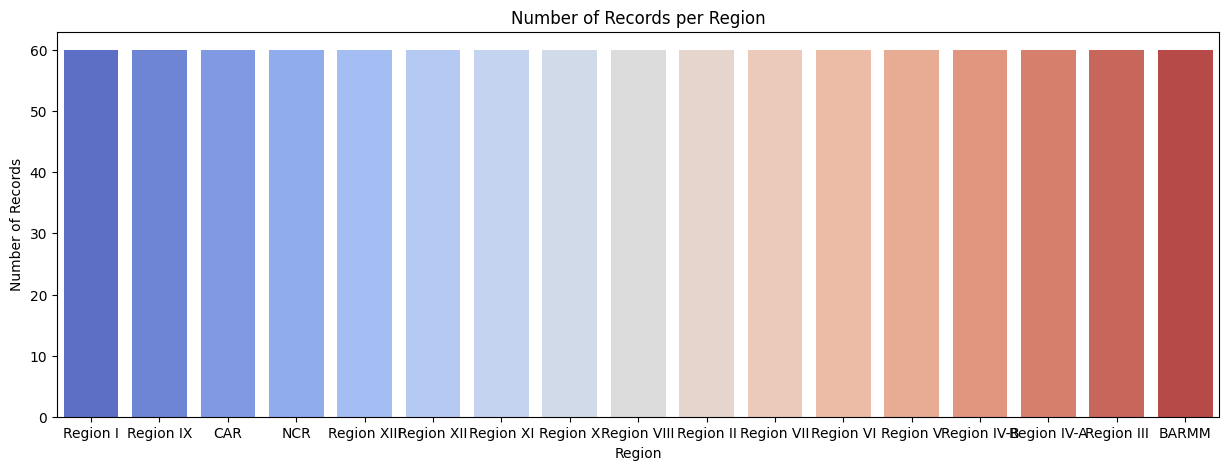

In [44]:
unique_regions = dengue["Region"].nunique()
print(f"Number of unique regions: {unique_regions}")
region_counts = dengue["Region"].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")
plt.title("Number of Records per Region")
plt.xlabel("Region")
plt.ylabel("Number of Records")
plt.show()

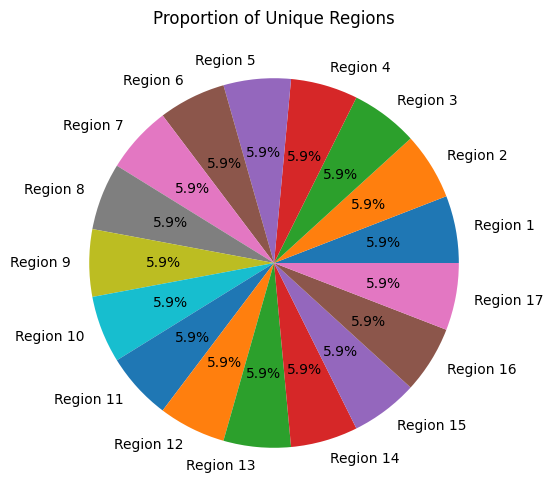

In [27]:
unique_regions = dengue["Region"].nunique()
plt.figure(figsize=(6,6))
plt.pie([1]*unique_regions, labels=[f"Region {i+1}" for i in range(unique_regions)], autopct="%1.1f%%")
plt.title("Proportion of Unique Regions")
plt.show()

<h1>Insight 8: Region with Highest Total Dengue Cases</h1>

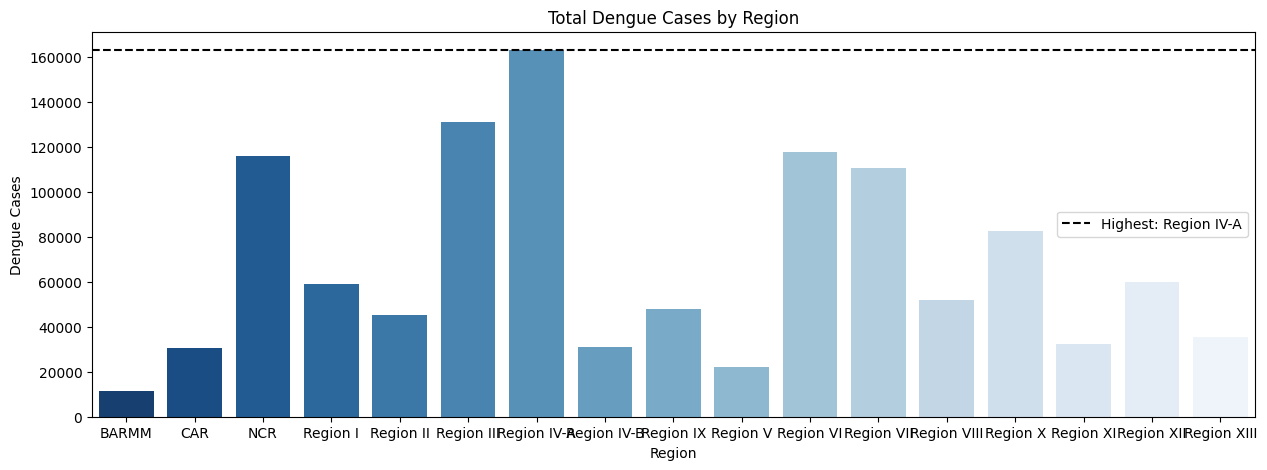

In [36]:
cases_by_region = dengue.groupby("Region")["Dengue_Cases"].sum()
max_cases_region = cases_by_region.idxmax()
plt.figure(figsize=(15,5))
sns.barplot(x=cases_by_region.index, y=cases_by_region.values, palette="Blues_r")
plt.axhline(y=cases_by_region[max_cases_region], color='black', linestyle="--", label=f"Highest: {max_cases_region}")
plt.title("Total Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Dengue Cases")
plt.legend()
plt.show()

<h1>Insight 9: Region with Highest Total Dengue Deaths</h1>

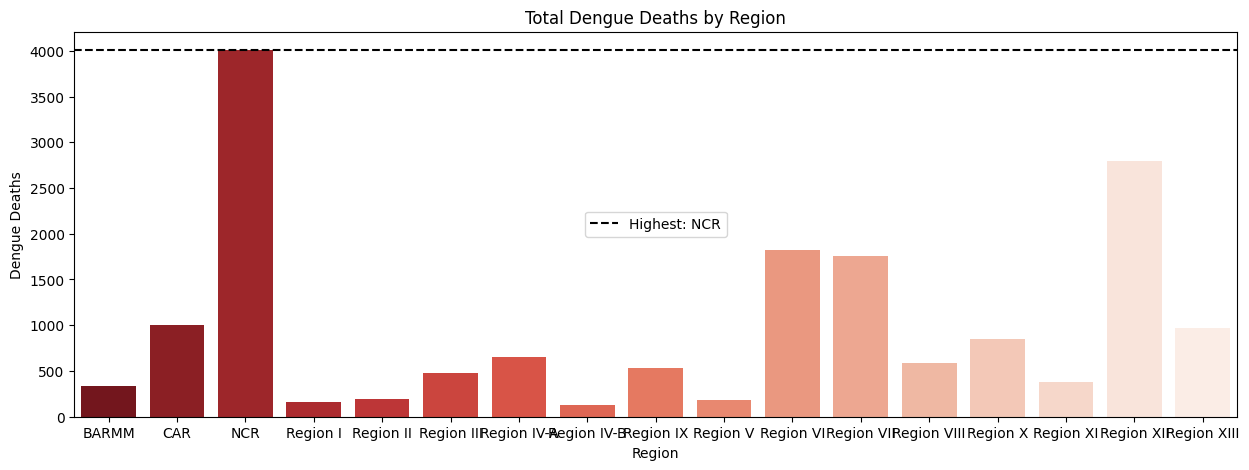

In [38]:
deaths_by_region = dengue.groupby("Region")["Dengue_Deaths"].sum()
max_deaths_region = deaths_by_region.idxmax()
plt.figure(figsize=(15,5))
sns.barplot(x=deaths_by_region.index, y=deaths_by_region.values, palette="Reds_r")
plt.axhline(y=deaths_by_region[max_deaths_region], color='black', linestyle="--", label=f"Highest: {max_deaths_region}")
plt.title("Total Dengue Deaths by Region")
plt.xlabel("Region")
plt.ylabel("Dengue Deaths")
plt.legend()
plt.show()

<h1>Insight 10: Year with Highest Dengue Cases</h1>

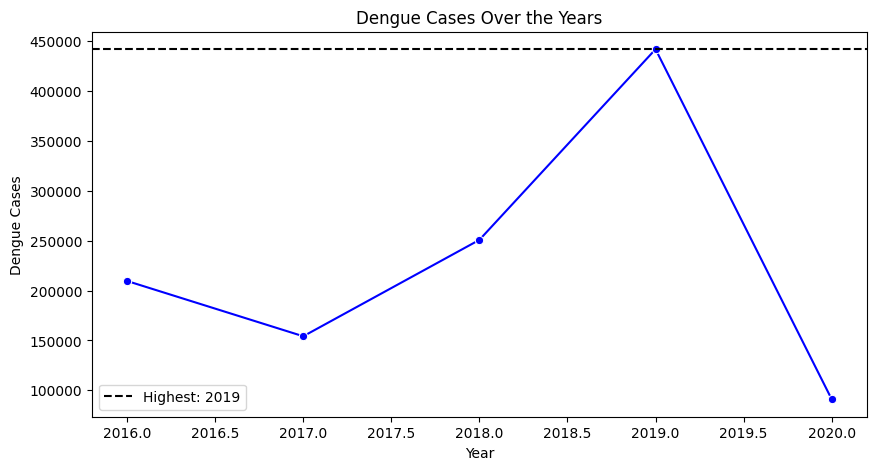

In [39]:
cases_by_year = dengue.groupby("Year")["Dengue_Cases"].sum()
max_cases_year = cases_by_year.idxmax()
plt.figure(figsize=(10,5))
sns.lineplot(x=cases_by_year.index, y=cases_by_year.values, marker="o", color="blue")
plt.axhline(y=cases_by_year[max_cases_year], color='black', linestyle="--", label=f"Highest: {max_cases_year}")
plt.title("Dengue Cases Over the Years")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.legend()
plt.show()

<h1>Insight 11: Trend of Dengue Cases & Deaths Over the Years</h1>

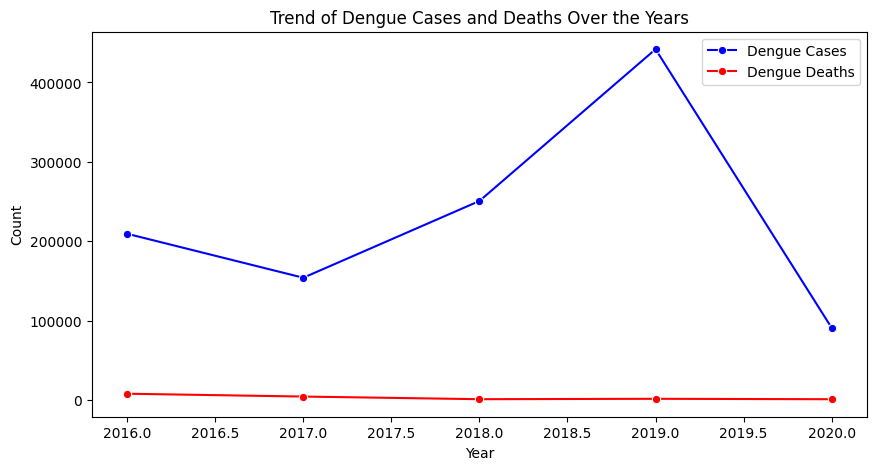

In [45]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=cases_by_year.index, y=cases_by_year.values, marker="o", color="blue", label="Dengue Cases")
sns.lineplot(x=deaths_by_year.index, y=deaths_by_year.values, marker="o", color="red", label="Dengue Deaths")
plt.title("Trend of Dengue Cases and Deaths Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

<h1>Insight 12: Month with Lowest & Highest Dengue Cases</h1>

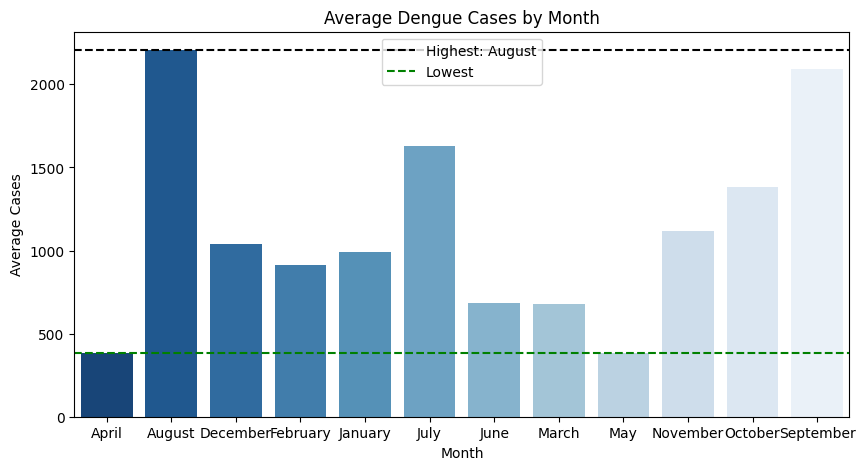

In [60]:
avg_cases_by_month = dengue.groupby("Month")["Dengue_Cases"].mean()
max_avg_cases_month = avg_cases_by_month.idxmax()
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_cases_by_month.index, y=avg_cases_by_month.values, palette="Blues_r")
plt.axhline(y=avg_cases_by_month[max_avg_cases_month], color='black', linestyle="--", label=f"Highest: {max_avg_cases_month}")
plt.axhline(y=avg_cases_by_month.min(), color='green', linestyle="--", label="Lowest")
plt.title("Average Dengue Cases by Month")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.legend()
plt.show()

<h1>Insight 13: Month with Lowest & Highest Dengue Deaths</h1>

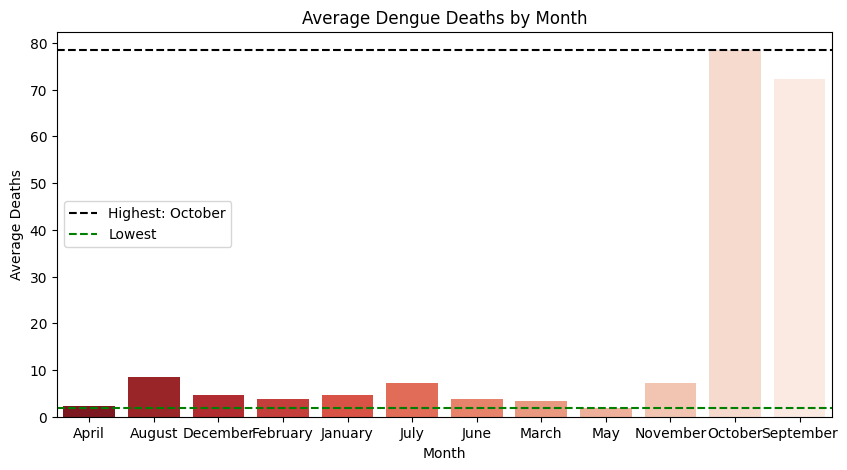

In [59]:
avg_deaths_by_month = dengue.groupby("Month")["Dengue_Deaths"].mean()
max_avg_deaths_month = avg_deaths_by_month.idxmax()  # Identify the month with the highest average deaths
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_deaths_by_month.index, y=avg_deaths_by_month.values, palette="Reds_r")
plt.axhline(y=avg_deaths_by_month[max_avg_deaths_month], color='black', linestyle="--", label=f"Highest: {max_avg_deaths_month}")
plt.axhline(y=avg_deaths_by_month.min(), color='green', linestyle="--", label="Lowest")
plt.title("Average Dengue Deaths by Month")
plt.xlabel("Month")
plt.ylabel("Average Deaths")
plt.legend()
plt.show()

<h1>Insight 14: Correlation Between Dengue Cases and Deaths</h1>

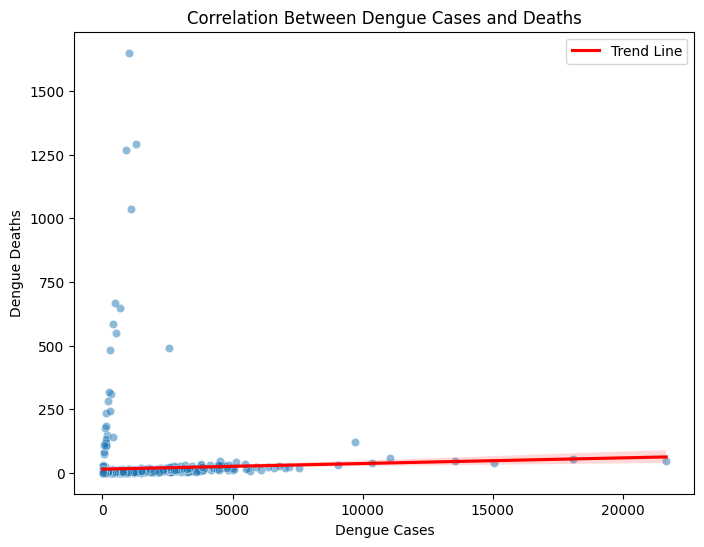

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], alpha=0.5)
sns.regplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], scatter=False, color="red", label="Trend Line")
plt.title("Correlation Between Dengue Cases and Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.legend()
plt.show()

<h1>Insight 15: Highest Death Rate Recorded in a Month </h1>

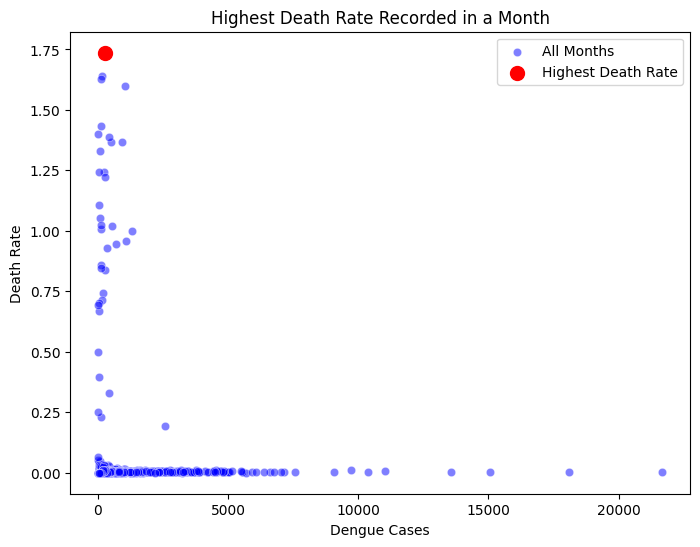

In [57]:
dengue["Death_Rate"] = dengue["Dengue_Deaths"] / dengue["Dengue_Cases"]
max_death_rate_row = dengue.loc[dengue["Death_Rate"].idxmax()]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Death_Rate"], alpha=0.5, color="blue", label="All Months")
plt.scatter(max_death_rate_row["Dengue_Cases"], max_death_rate_row["Death_Rate"], color="red", s=100, label="Highest Death Rate")
plt.title("Highest Death Rate Recorded in a Month")
plt.xlabel("Dengue Cases")
plt.ylabel("Death Rate")
plt.legend()
plt.show()


<h1>Insight 16: Overall Average Death Rate </h1>

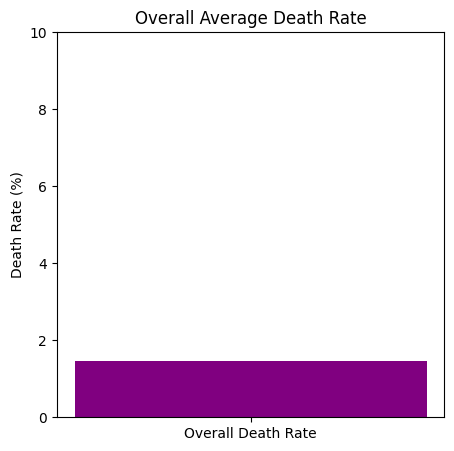

In [58]:
overall_death_rate = (dengue["Dengue_Deaths"].sum() / dengue["Dengue_Cases"].sum()) * 100
plt.figure(figsize=(5, 5))
plt.bar(["Overall Death Rate"], [overall_death_rate], color="purple")
plt.title("Overall Average Death Rate")
plt.ylabel("Death Rate (%)")
plt.ylim(0, max(overall_death_rate + 2, 10))
plt.show()

<h1>Insight 17: Monthly Dengue Cases and Deaths</h1>

<Figure size 1200x600 with 0 Axes>

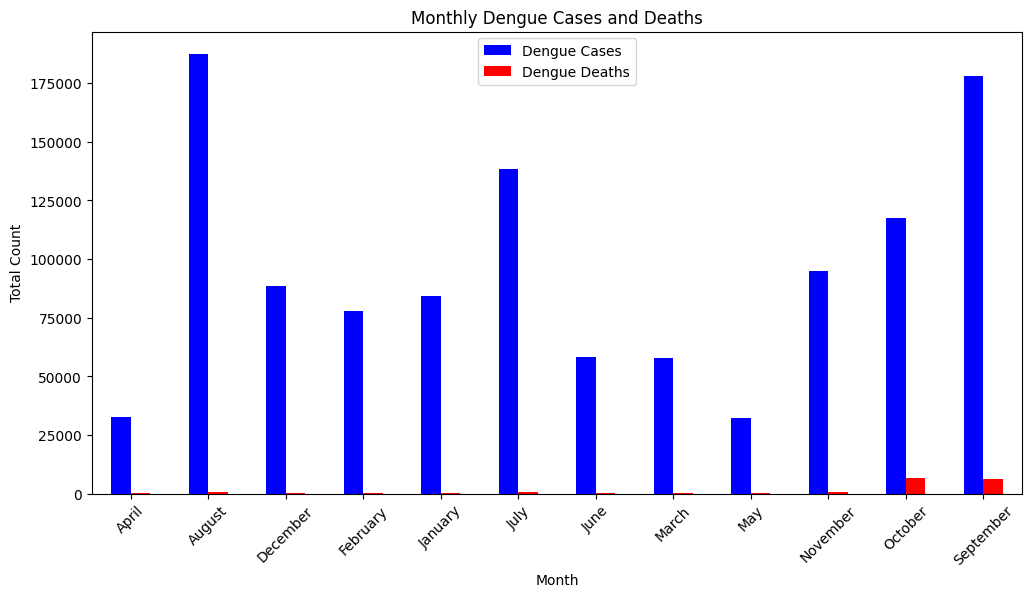

In [64]:
plt.figure(figsize=(12, 6))
df_grouped = dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum()
df_grouped.plot(kind="bar", stacked=False, figsize=(12, 6), color=["blue", "red"])
plt.title("Monthly Dengue Cases and Deaths")
plt.xlabel("Month")
plt.ylabel("Total Count")
plt.legend(["Dengue Cases", "Dengue Deaths"])
plt.xticks(rotation=45)
plt.show()

<h1>Insight 18: Heatmap of Dengue Cases and Deaths by Region</h1>

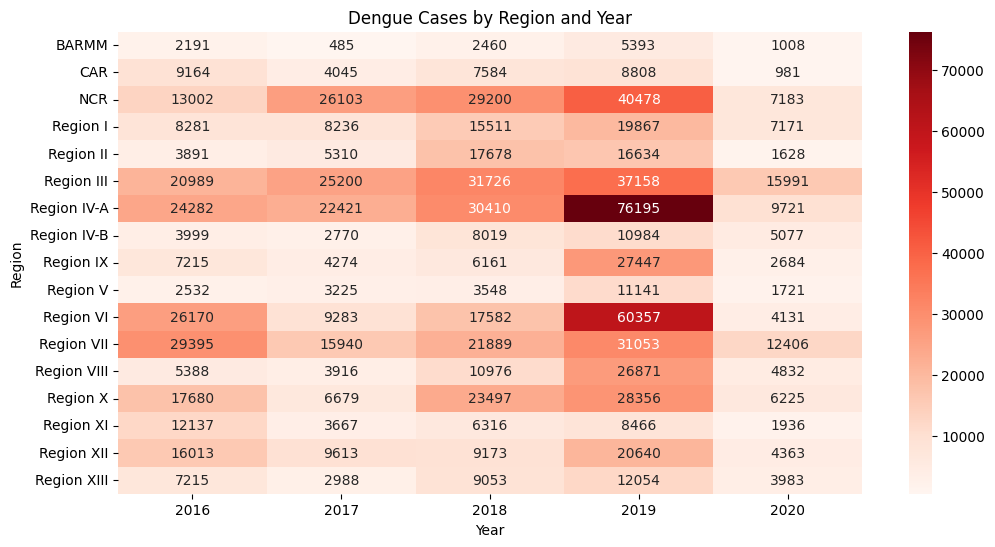

In [63]:
plt.figure(figsize=(12, 6))
df_pivot = dengue.pivot_table(index="Region", columns="Year", values="Dengue_Cases", aggfunc="sum")
sns.heatmap(df_pivot, cmap="Reds", annot=True, fmt=".0f")
plt.title("Dengue Cases by Region and Year")
plt.xlabel("Year")
plt.ylabel("Region")
plt.show()

<h1>Insight 19:  Distribution of Dengue Cases </h1>

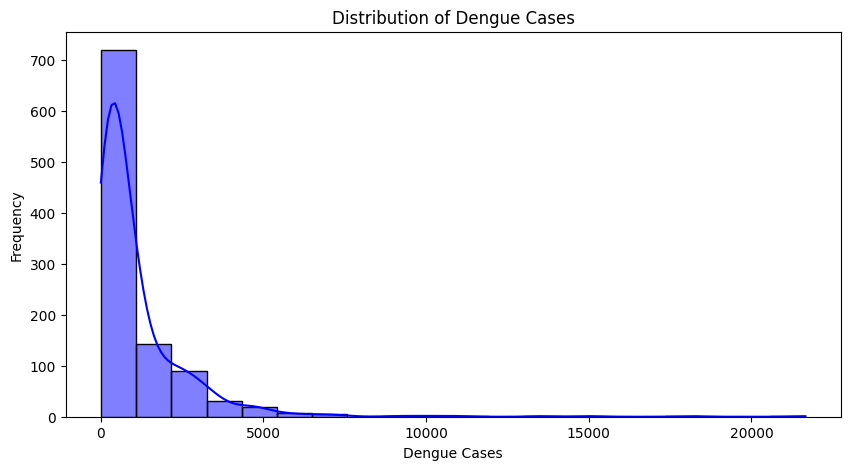

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(dengue["Dengue_Cases"], bins=20, kde=True, color="blue")
plt.title("Distribution of Dengue Cases")
plt.xlabel("Dengue Cases")
plt.ylabel("Frequency")
plt.show()


<h1>Insight 20: Dengue Cases vs. Deaths</h1>

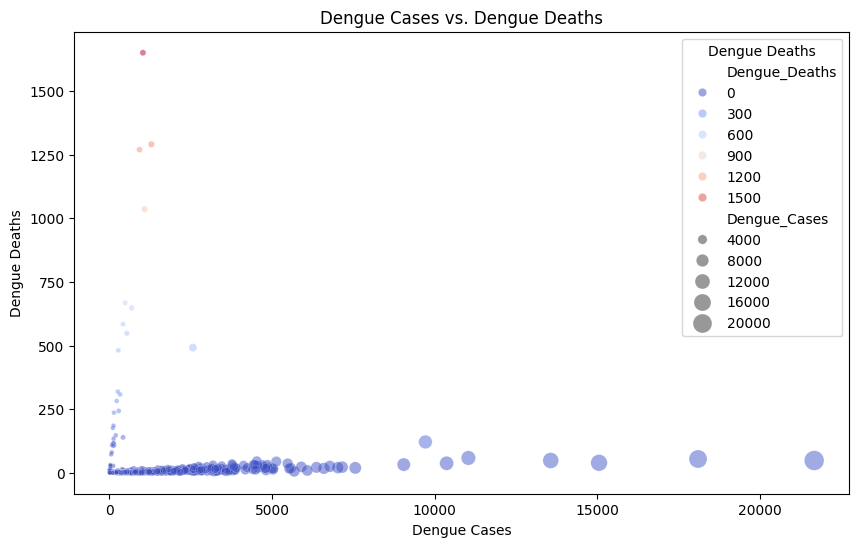

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dengue["Dengue_Cases"], 
    y=dengue["Dengue_Deaths"], 
    size=dengue["Dengue_Cases"], 
    hue=dengue["Dengue_Deaths"], 
    alpha=0.5, 
    palette="coolwarm",
    sizes=(10, 200)
)
plt.title("Dengue Cases vs. Dengue Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.legend(title="Dengue Deaths")
plt.show()